# IMPORTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# DATASET READ

In [3]:
data = pd.read_csv('/home/msc2/Documents/Python/ML/MDSC-ML/Datasets/Health_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [6]:
fig = px.histogram(data, 
                   x='bmi', 
                   marginal='box', 
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
fig = px.histogram(data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(data, 
                   x='charges', 
                   marginal='box',
                   title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(data,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["black","green"],
                   title = 'Different charges over genders'
               
)
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
px.histogram(data, x = "smoker", color = "sex", title = "Smokers according to Gender")

In [11]:
fig = px.histogram(data,
                    x = "charges",
                    color = "sex",
                    facet_col = "region",
                    title = "Charges of different sex over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

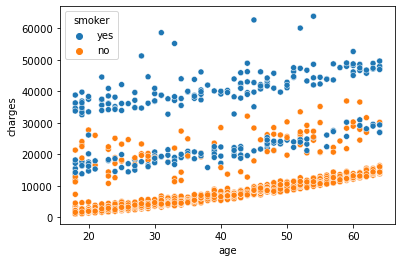

In [12]:
sns.scatterplot(
    data = data,
    x = data.age,
    y = data.charges,
    hue = data.smoker,
    legend = 'auto'
)
plt.show()

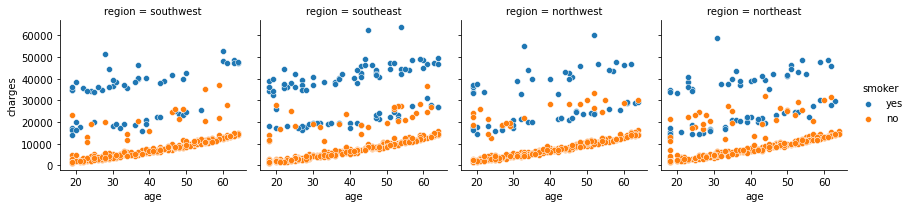

In [13]:
g = sns.FacetGrid(data, col = "region", hue = 'smoker')
g.map(sns.scatterplot, "age", "charges")
g.add_legend()
plt.show()

# PREPROCESSING PIPELINES

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
nom = ['sex', 'smoker', 'region']

In [16]:
encoder_sex = OneHotEncoder().fit(data[['sex']])
encoder_sex.categories_

data[['sex_F','sex_M']] = encoder_sex.transform(data[['sex']]).toarray()
data

,age,sex,bmi,children,smoker,region,charges,sex_F,sex_M
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0


In [17]:
encoder_region = OneHotEncoder().fit(data[['region']])
encoder_region.categories_

data[['ne', 'nw', 'se', 'sw']] = encoder_region.fit_transform(data[['region']]).toarray()
data

,age,sex,bmi,children,smoker,region,charges,sex_F,sex_M,ne,nw,se,sw
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
encoder_smo = OneHotEncoder().fit(data[['smoker']])
encoder_smo.categories_

data[['smo_no', 'smo_yes']] = encoder_smo.fit_transform(data[['smoker']]).toarray()
data

,age,sex,bmi,children,smoker,region,charges,sex_F,sex_M,ne,nw,se,sw,smo_no,smo_yes
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
data.drop(columns = ['sex', 'smoker', 'region'], inplace= True)
data

,age,bmi,children,charges,sex_F,sex_M,ne,nw,se,sw,smo_no,smo_yes
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
full_pipe = ColumnTransformer([
    ("num", StandardScaler(), ['age', 'bmi', 'children'])
])

df = full_pipe.fit_transform(data)
print(df)
type(df)

[[-1.43876426 -0.45332    -0.90861367]
 [-1.50996545  0.5096211  -0.07876719]
 [-0.79795355  0.38330685  1.58092576]
 ...
 [-1.50996545  1.0148781  -0.90861367]
 [-1.29636188 -0.79781341 -0.90861367]
 [ 1.55168573 -0.26138796 -0.90861367]]


numpy.ndarray

In [21]:
data

,age,bmi,children,charges,sex_F,sex_M,ne,nw,se,sw,smo_no,smo_yes
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
scaler = StandardScaler()

In [26]:
scaler.fit(data[['age']])
data['age'] = scaler.transform(data[['age']])

scaler.fit(data[['bmi']])
data['bmi'] = scaler.transform(data[['bmi']])

scaler.fit(data[['children']])
data['children'] = scaler.transform(data[['children']])
data

,age,bmi,children,charges,sex_F,sex_M,ne,nw,se,sw,smo_no,smo_yes
0,-1.438764,-0.453320,-0.908614,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.513149,-0.292556,-0.908614,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,-1.509965,0.206139,-0.908614,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,-1.509965,1.014878,-0.908614,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# FEATURE SELECTION

In [31]:
def fit_linear(X, y):
    model_k = LinearRegression()
    model_k.fit(X, y)
    RSS = mean_squared_error(y, model_k.predict(X)) * len(y)
    R_sq = model_k.score(X, y)
    adj_R_sq = 1 - (1 - R_sq) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

    return RSS, R_sq, adj_R_sq

In [37]:
import tqdm.notebook
import itertools

In [30]:
df = data

In [39]:
y = df.charges
X = df.drop(columns = 'charges', axis = 1)

m = 11

RSS_list, R_sq_list, feature_list, adj_R_sq_list, numb_features = [], [], [], [], []

for k in tqdm.notebook.trange(1, len(X.columns) + 1, desc = 'Bhaag Loop Bhaag...'):

    for combo in itertools.combinations(X.columns, k):

        tmp = fit_linear(X[list(combo)], y)
        RSS_list.append(tmp[0])
        R_sq_list.append(tmp[1])
        adj_R_sq_list.append(tmp[2])
        feature_list.append(combo)
        numb_features.append(len(combo))

df = pd.DataFrame({'No.of Features' : numb_features, 'RSS' : RSS_list, 'R Squared' : R_sq_list, 'Adj R Squared' : adj_R_sq_list, 'Features' : feature_list})

Bhaag Loop Bhaag...:   0%|          | 0/11 [00:00<?, ?it/s]

In [41]:
df_min = df[df.groupby('No.of Features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('No.of Features')['R Squared'].transform(max) == df['R Squared']]
df_max_adj = df[df.groupby('No.of Features')['Adj R Squared'].transform(max) == df['Adj R Squared']]
display(df_min.head())
display(df_max_adj.head(10))

,No.of Features,RSS,R Squared,Adj R Squared,Features
9,1,7.455432e+10,0.619765,0.619480,"(smo_no,)"
10,1,7.455432e+10,0.619765,0.619480,"(smo_yes,)"
19,2,5.462612e+10,0.721401,0.720983,"(age, smo_no)"
20,2,5.462612e+10,0.721401,0.720983,"(age, smo_yes)"
73,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smo_no)"


,No.of Features,RSS,R Squared,Adj R Squared,Features
9,1,7.455432e+10,0.619765,0.619480,"(smo_no,)"
10,1,7.455432e+10,0.619765,0.619480,"(smo_yes,)"
19,2,5.462612e+10,0.721401,0.720983,"(age, smo_no)"
20,2,5.462612e+10,0.721401,0.720983,"(age, smo_yes)"
73,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smo_no)"
74,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smo_yes)"
237,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smo_no)"
238,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smo_yes)"
577,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, ne, smo_no)"
578,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, ne, smo_yes)"


# MODELLING

In [42]:
from sklearn.model_selection import train_test_split

X = data[["age", "bmi", "children", "ne", "smo_yes"]]
y = data.charges

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [43]:
model = LinearRegression()
model.fit(XTrain, yTrain)
model

LinearRegression()

In [44]:
def adj_r_sqr(Xtrain, ytrain, Xtest, ytest):
    model = LinearRegression()  
    model.fit(Xtrain, ytrain)
    r_2_train = model.score(Xtrain, ytrain)
    r_2_test = model.score(Xtest, ytest)
    adj_r_2_train =  1 - (1 - r_2_train) * (len(ytrain) - 1)/(len(ytrain) - Xtrain.shape[1] - 1)
    adj_r_2_test =  1 - (1 - r_2_test) * (len(ytest) - 1) / (len(ytest) - Xtest.shape[1] - 1)  
    return adj_r_2_train, adj_r_2_test

In [46]:
adj_r_sqr(XTrain,yTrain,XTest,yTest)

(0.7486563173238565, 0.7458614064024215)

In [47]:
model.score(XTrain,yTrain)

0.7498319192072809

In [48]:
model.score(XTest,yTest)

0.75062055609526

In [49]:
yhat = model.predict(XTest)
results= pd.DataFrame({"y":yTest,"yhat":yhat})
results.head()

,y,yhat
1146,52590.82939,37499.810563
951,47462.89400,39483.465165
253,4260.74400,5758.384168
806,28476.73499,12141.841247
1067,5757.41345,12643.057929
